In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
import astropy.units as u
from astropy.constants import G, M_sun
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, dist
from pipeline_2D import to_osyris_ivs

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

In [2]:
#datai = pipeline(snap = 404, run = 'sink178va_3e2', sink_id=177)
data = pipeline(snap = 227, run = 'sinkold13amr01', sink_id = 13)
#data = pipeline(snap = 272, run = 'goodold13', sink_id = 13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 9210/9210 [03:33<00:00, 43.14it/s]


In [3]:
for p in tqdm.tqdm(data.sn.patches):
    p.B = np.concatenate([p.var(f'b'+axis)[None,...] for axis in ['x','y','z']], axis = 0)

100%|██████████| 9210/9210 [02:06<00:00, 72.76it/s] 


In [4]:
res = 600; width = 150 
variable = ['d']
vector = ['vrel', 'B']
data.recalc_L(verbose = 1)
data.to_osyris_ivs(variables=variable, data_name = 'face_on', view = width, resolution=res, vectors = vector, )#, dz = width, viewpoint=np.cross(data.L, np.array([0,0,1])))


Converged mean angular momentum vector after 1 iteration(s)
Looping over DISPATCH data to extract data at highest level


100%|██████████| 1855/1855 [00:53<00:00, 34.68it/s] 


Setting up Osyris data structure


/groups/astro/kxm508/.local/lib/python3.8/site-packages/numpy/ma/core.py:711: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(a, copy=False, subok=subok)


In [ ]:
data.recalc_L(verbose = 1)
data.to_osyris_ivs(variables=variable, data_name = 'edge_on', view = width, resolution=res, vectors = vector, dz = width, viewpoint = np.cross(data.L, np.array([-1,0,0])))


Converged mean angular momentum vector after 0 iteration(s)
Looping over DISPATCH data to extract data at highest level


100%|██████████| 1921/1921 [00:18<00:00, 102.53it/s]


Setting up Osyris data structure


In [ ]:
vel_face_on = data.osyris_ivs['face_on'][1] * data.cms_velocity
velnorm_face_on = np.sqrt(vel_face_on[...,0]**2 + vel_face_on[...,1]**2)

vel_edge_on = data.osyris_ivs['edge_on'][1] * data.cms_velocity
velnorm_edge_on = np.sqrt(vel_edge_on[...,0]**2 + vel_edge_on[...,1]**2)


X, Y = [np.linspace(-width //2, width // 2, res) for _ in range(2)]
xx,yy = np.meshgrid(X, Y)



In [ ]:
skip_ticks = width // 8
xticks = np.arange(- skip_ticks * 3, skip_ticks * 4, skip_ticks)

In [ ]:
xticks

array([-54, -36, -18,   0,  18,  36,  54])

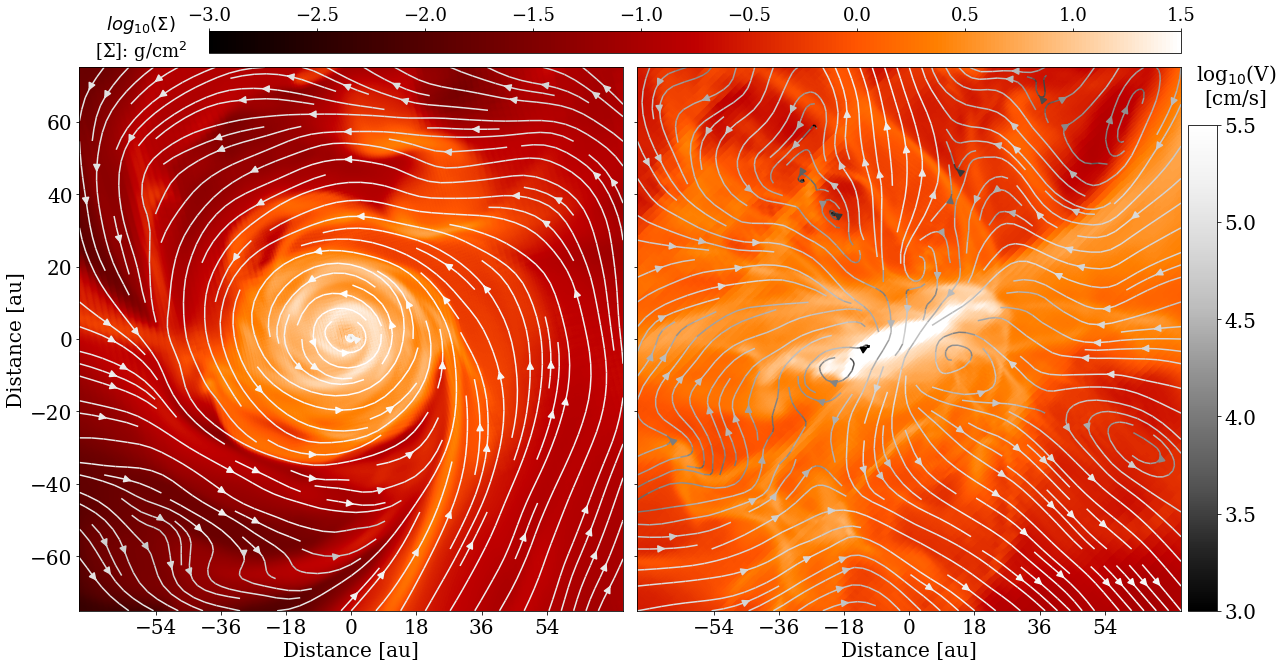

In [ ]:
Σ_face_on = data.osyris_ivs['face_on'][0] * data.cgs_density
Σ_edge_on = data.osyris_ivs['edge_on'][0] * data.cgs_density
ext = width // 2

density = 1.5
vmin_colormap, vmax_colormap = -3, 1.5
vmin_strm, vmax_strm = 3, 5.5

norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)

fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)

for ax in axs:
    ax.set_xticks(xticks)

ax = axs[0]
ax.set(xlabel = 'Distance [au]', ylabel = 'Distance [au]', xlim = (-ext, ext), ylim = (-ext, ext))
cs = ax.imshow(np.log10(Σ_face_on), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'gist_heat', vmin = vmin_colormap, vmax = vmax_colormap)
strm  = ax.streamplot(xx, yy, vel_face_on[...,0] , vel_face_on[...,1], color = np.log10(velnorm_face_on), cmap=mpl.cm.Greys_r, arrowsize=1.5, norm = norm, density = density)

ax = axs[1]
ax.set(xlabel = 'Distance [au]', xlim = (-ext, ext), ylim = (-ext, ext))
cs = ax.imshow(np.log10(Σ_edge_on), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'gist_heat', vmin = vmin_colormap, vmax = vmax_colormap)
strm  = ax.streamplot(xx, yy, vel_edge_on[...,0] , vel_edge_on[...,1], color = np.log10(velnorm_edge_on), cmap=mpl.cm.Greys_r, density = density, arrowsize=1.5, norm = norm)

colorbar_cmap = fig.add_axes([0.22, 0.9, 0.675, 0.03])
cbar = fig.colorbar(cs, cax = colorbar_cmap,  orientation = 'horizontal')
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -40, x = -0.07, rotation = 0, fontsize = 18)
cbar.ax.tick_params(labelsize=18)

colorbar_strm = fig.add_axes([0.9, 0.125, 0.02, 0.675])
cbar_strm = fig.colorbar(strm.lines, cax = colorbar_strm)
cbar_strm.set_label('log$_{10}$(V)\n[cm/s]', labelpad = -20, y = 1.13, rotation = 0, fontsize = 20)


fig.subplots_adjust(wspace=0, hspace=0.2)

In [ ]:
0.5*(400 - 343)

28.5

In [ ]:
B_face_on = data.osyris_ivs['face_on'][2] * data.sn.scaling.b
Bnorm_face_on = np.sqrt(B_face_on[...,0]**2 + B_face_on[...,1]**2)

B_edge_on = data.osyris_ivs['edge_on'][2] * data.sn.scaling.b
Bnorm_edge_on = np.sqrt(B_edge_on[...,0]**2 + B_edge_on[...,1]**2)

X, Y = [np.linspace(-width //2, width // 2, res) for _ in range(2)]
xx,yy = np.meshgrid(X, Y)

In [ ]:
vel_edge_on.min()

-472264.32860469853

In [ ]:
V_jet = np.sum(vel_edge_on * data.L[None, None,:], axis = -1)
V_jet.min(), V_jet.max()

(-549744.6703781541, 1648.3799074162744)

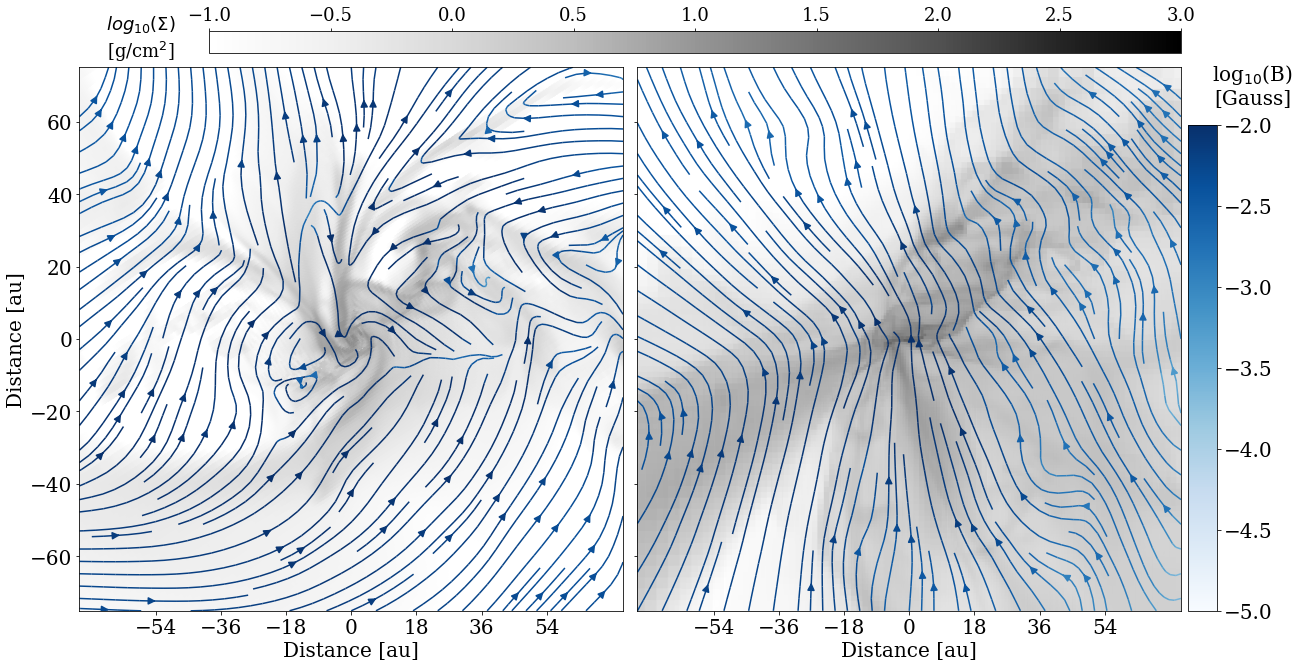

In [ ]:
Σ_face_on = data.osyris_ivs['face_on'][0] * data.cgs_density
Σ_edge_on = data.osyris_ivs['edge_on'][0] * data.cgs_density
ext = width // 2

density = 1.5
vmin_colormap, vmax_colormap = -1, 3
vmin_strm, vmax_strm = -5, -2

norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)

fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)

for ax in axs:
    ax.set_xticks(xticks)

ax = axs[0]
ax.set(xlabel = 'Distance [au]', ylabel = 'Distance [au]', xlim = (-ext, ext), ylim = (-ext, ext))
cs = ax.imshow(np.log10(Σ_face_on), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'Greys', vmin = vmin_colormap, vmax = vmax_colormap)
strm  = ax.streamplot(xx, yy, B_face_on[...,0] , B_face_on[...,1], color = np.log10(Bnorm_face_on), cmap=mpl.cm.Blues, arrowsize=1.5, norm = norm, density = density)

ax = axs[1]
ax.set(xlabel = 'Distance [au]', xlim = (-ext, ext), ylim = (-ext, ext))
#cs = ax.imshow(V_jet, extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'coolwarm', norm = colors.SymLogNorm(linthresh=1e1, linscale=0.5, vmin = -1e5, vmax = 1e5))
cs = ax.imshow(np.log10(Σ_edge_on), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'Greys', vmin = vmin_colormap, vmax = vmax_colormap)
strm  = ax.streamplot(xx, yy, B_edge_on[...,0] , B_edge_on[...,1], color = np.log10(Bnorm_edge_on), cmap=mpl.cm.Blues, density = density, arrowsize=1.5, norm = norm)

colorbar_cmap = fig.add_axes([0.22, 0.9, 0.675, 0.03])
cbar = fig.colorbar(cs, cax = colorbar_cmap,  orientation = 'horizontal')
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('$log_{10}(Σ)$\n[g/cm$^2$]', labelpad = -40, x = -0.07, rotation = 0, fontsize = 18)
cbar.ax.tick_params(labelsize=18)

colorbar_strm = fig.add_axes([0.9, 0.125, 0.02, 0.675])
cbar_strm = fig.colorbar(strm.lines, cax = colorbar_strm)
cbar_strm.set_label('log$_{10}$(B)\n[Gauss]', labelpad = -20, y = 1.13, rotation = 0, fontsize = 20)


fig.subplots_adjust(wspace=0, hspace=0.2)